In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = np.array(df)
m, n = df.shape
np.random.shuffle(df)

data_dev = df[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = df[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255



In [5]:
def init_params():
    W1 = np.random.randn(10,784) * np.sqrt(1/784)
    b1 = np.zeros((10,1))
    W2 = np.random.randn(10,10) * np.sqrt(1/10)
    b2 = np.zeros((10,1))
    return W1,b1,W2,b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0))  # stability fix
    return expZ / np.sum(expZ, axis=0, keepdims=True)
    
def foward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y= np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0
    
def backwards_prop(A2, A1, Z1, Z2,W2, X,Y):
    one_hot_Y = one_hot(Y)
    m = X.shape[1]
    dZ2 = A2-one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1-alpha*dW1
    b1 = b1-alpha*db1
    W2 = W2-alpha*dW2
    b2 = b2-alpha*db2
    return W1, b1, W2, b2
    
    
    

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/Y.size

def compute_loss_with_L2(A2, Y, W1, W2, lam=0.01):
    one_hot_Y = one_hot(Y)
    CE = -np.mean(np.sum(one_hot_Y * np.log(A2 + 1e-8), axis=0))
    L2 = lam * (np.sum(W1**2) + np.sum(W2**2))
    return CE + L2


def gradient_descent(X, Y, iterations, initial_lr, lam=0.01):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        alpha = initial_lr * (0.95 ** (i // 10))  
        Z1, A1, Z2, A2 = foward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwards_prop(A2, A1, Z1, Z2, W2, X, Y)
        dW1 += lam * W1
        dW2 += lam * W2
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            loss = compute_loss_with_L2(A2, Y, W1, W2, lam)
            acc = get_accuracy(get_predictions(A2), Y)
            print(f"Iteration {i} | Loss: {loss:.4f} | Accuracy: {acc:.4f}")
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.10 )

[6 4 2 ... 6 9 9] [3 0 4 ... 3 6 0]
Iteration 0 | Loss: 2.5780 | Accuracy: 0.0707
[3 6 9 ... 3 6 6] [3 0 4 ... 3 6 0]
Iteration 10 | Loss: 2.2242 | Accuracy: 0.3086
[3 6 6 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 20 | Loss: 1.9454 | Accuracy: 0.4281
[3 0 9 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 30 | Loss: 1.7188 | Accuracy: 0.5769
[3 0 4 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 40 | Loss: 1.5336 | Accuracy: 0.6716
[3 0 4 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 50 | Loss: 1.3866 | Accuracy: 0.7292
[3 0 4 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 60 | Loss: 1.2756 | Accuracy: 0.7641
[3 0 4 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 70 | Loss: 1.1942 | Accuracy: 0.7844
[3 0 4 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 80 | Loss: 1.1340 | Accuracy: 0.7990
[3 0 4 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 90 | Loss: 1.0884 | Accuracy: 0.8114
[3 0 4 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 100 | Loss: 1.0531 | Accuracy: 0.8192
[3 0 4 ... 3 6 0] [3 0 4 ... 3 6 0]
Iteration 110 | Loss: 1.0253 | Accuracy: 0.8266
[3 

In [8]:
A2_dev = foward_prop(W1, b1, W2, b2, X_dev)[-1]
preds_dev = get_predictions(A2_dev)
dev_acc = get_accuracy(preds_dev, Y_dev)
print(f"Dev Set Accuracy: {dev_acc:.4f}")

[0 8 0 8 4 7 9 1 9 1 8 1 5 7 2 3 6 9 8 3 3 5 1 3 7 6 2 1 1 0 3 4 3 2 3 4 0
 1 5 5 0 8 6 1 5 0 3 6 9 5 8 7 8 0 2 2 5 6 4 4 4 5 7 5 8 7 5 6 6 4 9 1 7 3
 4 0 2 9 1 8 8 9 5 1 3 1 7 6 1 0 3 0 8 0 8 5 5 4 5 1 0 3 1 6 5 6 0 6 1 6 6
 2 4 4 7 7 4 0 3 5 7 5 8 4 0 9 2 7 5 3 8 7 4 3 1 4 8 0 8 2 3 5 1 9 3 9 6 0
 9 2 1 1 2 2 7 8 6 2 8 3 3 7 0 7 1 8 2 0 4 4 4 1 7 3 8 6 2 6 0 8 2 7 0 5 1
 5 9 5 3 4 3 1 3 7 1 3 5 2 7 1 3 9 3 6 8 3 6 9 2 5 6 9 4 1 4 2 8 5 1 7 4 3
 6 7 9 5 8 5 5 4 1 0 8 4 8 1 7 3 1 1 3 9 9 3 6 2 1 7 8 0 6 4 6 9 8 3 8 1 9
 2 8 1 3 6 2 3 3 5 9 0 3 3 4 1 9 7 7 1 1 9 0 3 8 8 8 7 6 7 2 1 8 4 0 1 6 4
 7 7 4 9 3 2 6 9 0 9 9 4 3 1 3 2 6 0 9 6 8 6 6 4 1 7 2 8 7 2 7 6 2 3 8 7 7
 2 4 6 6 8 8 4 1 8 9 8 9 9 1 9 6 2 5 2 4 1 1 9 8 2 4 3 7 4 0 4 8 0 9 1 8 2
 3 7 3 3 9 9 5 0 0 1 4 1 2 9 3 4 9 1 3 7 0 1 4 0 9 1 5 5 3 7 3 1 5 1 1 3 7
 0 1 8 6 9 2 0 2 4 7 7 1 1 9 9 0 1 3 3 7 1 2 5 0 3 2 9 5 0 2 1 9 2 6 9 7 1
 6 4 5 1 6 8 0 1 7 2 6 0 6 7 5 4 6 3 9 7 3 1 7 1 9 2 7 8 2 3 8 7 4 9 5 2 2
 8 1 9 1 0 6 3 1 8 1 2 9 

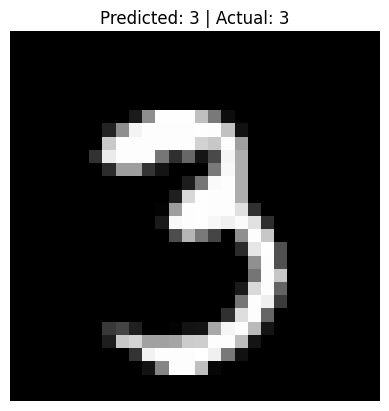

In [9]:
def show_prediction(index, X, Y, W1, b1, W2, b2):
    x_single = X[:, index].reshape(-1, 1)  # column vector (784,1)
    y_true = Y[index]
    
    # Forward pass for this one image
    A2 = foward_prop(W1, b1, W2, b2, x_single)[-1]
    prediction = get_predictions(A2)[0]

    # Reshape for 28x28 image
    image = x_single.reshape(28, 28)

    # Plot
    plt.imshow(image, cmap="gray")
    plt.title(f"Predicted: {prediction} | Actual: {y_true}")
    plt.axis("off")
    plt.show()

show_prediction(19, X_dev, Y_dev, W1, b1, W2, b2)

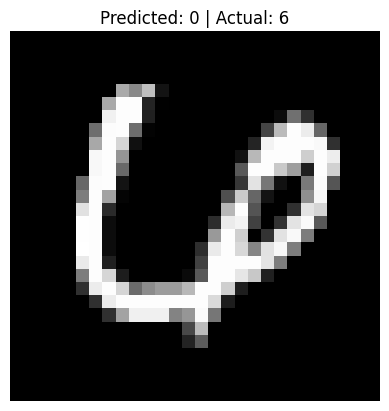

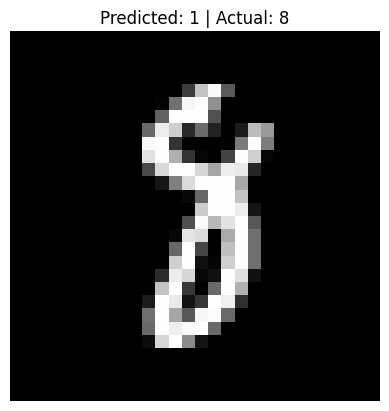

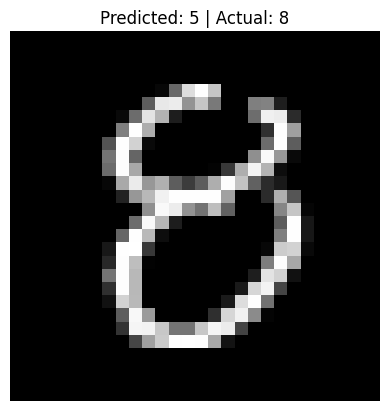

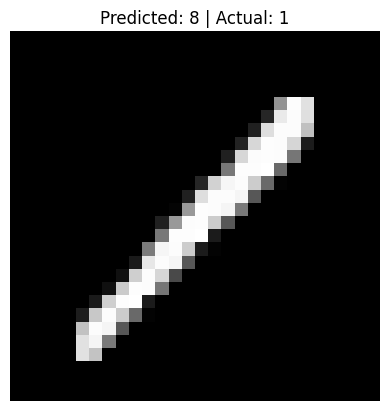

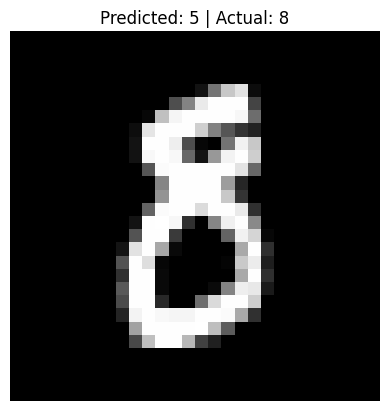

In [10]:
def show_misclassified(X, Y, W1, b1, W2, b2, limit=5):
    A2 = foward_prop(W1, b1, W2, b2, X)[-1]
    preds = get_predictions(A2)
    wrong_indices = np.where(preds != Y)[0]

    for i in wrong_indices[:limit]:
        show_prediction(i, X, Y, W1, b1, W2, b2)


show_misclassified(X_dev, Y_dev, W1, b1, W2, b2, limit=5)